# **Import the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import the Dataset**

In [ ]:
data1 = pd.read_csv('weather_prediction_dataset.csv')

In [ ]:
data1_1 = data1.iloc[:,[0,51,52,53,54,55,56,57,58,59]]
data1_1.columns

Index(['DATE', 'HEATHROW_cloud_cover', 'HEATHROW_humidity',
       'HEATHROW_pressure', 'HEATHROW_global_radiation',
       'HEATHROW_precipitation', 'HEATHROW_sunshine', 'HEATHROW_temp_mean',
       'HEATHROW_temp_min', 'HEATHROW_temp_max'],
      dtype='object')

In [ ]:
data1_2 = data1_1.iloc[:,[7]]
data1_3 = data1_1.iloc[:,[0,1,2,3,4,5,6,8,9]]

data2 = pd.concat([data1_3,data1_2],axis = 1)
data2.columns = ['DATE', 'cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_min' , 'temp_max', 'temp_mean']

data2

,DATE,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_min,temp_max,temp_mean
0,20000101,7,0.94,1.0245,0.18,0.00,0.4,4.9,10.8,7.0
1,20000102,7,0.89,1.0253,0.20,0.02,0.7,5.0,11.5,7.9
2,20000103,8,0.91,1.0186,0.13,0.60,0.0,7.2,9.5,9.4
3,20000104,5,0.89,1.0148,0.34,0.02,2.9,4.4,11.0,7.0
4,20000105,5,0.85,1.0142,0.25,0.08,1.3,1.9,10.8,6.4
...,...,...,...,...,...,...,...,...,...,...
3649,20091228,2,0.90,1.0043,0.37,0.06,3.7,-2.2,5.0,1.7
3650,20091229,8,0.92,0.9949,0.12,1.28,0.0,-1.2,5.2,1.9
3651,20091230,8,0.97,0.9923,0.12,0.36,0.0,4.0,4.4,4.6
3652,20091231,7,0.83,0.9993,0.13,0.00,0.0,3.3,3.6,3.9


# **EDA**

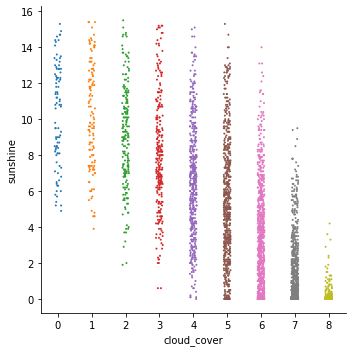

In [ ]:
sns.catplot(x = "cloud_cover", y = "sunshine",data = data2, s=2)

با توجه به این نمودار، میزان آفتاب با میزان پوشش ابر رابطه معکوس دارد. در واقع هر مقدار پوشش ابر بیشتر باشد، آفتاب کمتر خواهد بود و بلعکس.

In [ ]:
data2.iloc[:, [1,5]].groupby(['cloud_cover']).mean()

,precipitation
cloud_cover,
0,0.006154
1,0.013750
2,0.033247
3,0.053784
4,0.081648
5,0.160778
6,0.193512
7,0.268868
8,0.351195


با توجه به این جدول، میزان بارندگی با میزان پوشش ابر رابطه مستقیم دارد، به طوری که با افزایش پوشش ابری میزان بارندگی بیشتر می‌شود و بلعکس.

# **Data Preparation**

### Handle Categorical Data

In [ ]:
data2.dtypes

DATE                  int64
cloud_cover           int64
humidity            float64
pressure            float64
global_radiation    float64
precipitation       float64
sunshine            float64
temp_min            float64
temp_max            float64
temp_mean           float64
dtype: object

In [ ]:
data3 = data2.drop('DATE', axis = 1)
data3

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_min,temp_max,temp_mean
0,7,0.94,1.0245,0.18,0.00,0.4,4.9,10.8,7.0
1,7,0.89,1.0253,0.20,0.02,0.7,5.0,11.5,7.9
2,8,0.91,1.0186,0.13,0.60,0.0,7.2,9.5,9.4
3,5,0.89,1.0148,0.34,0.02,2.9,4.4,11.0,7.0
4,5,0.85,1.0142,0.25,0.08,1.3,1.9,10.8,6.4
...,...,...,...,...,...,...,...,...,...
3649,2,0.90,1.0043,0.37,0.06,3.7,-2.2,5.0,1.7
3650,8,0.92,0.9949,0.12,1.28,0.0,-1.2,5.2,1.9
3651,8,0.97,0.9923,0.12,0.36,0.0,4.0,4.4,4.6
3652,7,0.83,0.9993,0.13,0.00,0.0,3.3,3.6,3.9


### Handle Missing Values

In [ ]:
data3.isnull().sum()

cloud_cover         0
humidity            0
pressure            0
global_radiation    0
precipitation       0
sunshine            0
temp_min            0
temp_max            0
temp_mean           0
dtype: int64

### Handle Outliers

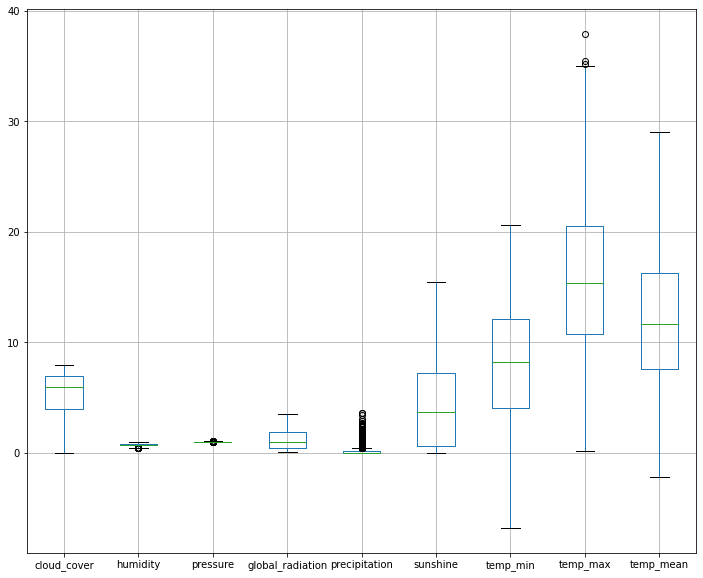

In [ ]:
fig = plt.figure(figsize = (12,10))
data3.boxplot()

In [ ]:
#A function that displays the name, range, and percentage of incorrect values ​​for each feature
def bounds(data,i,name):
  Q1 = data.iloc[:,i].quantile(0.25) 
  Q3 = data.iloc[:,i].quantile(0.75)
  LB = Q1 - 1.5 * (Q3 - Q1)
  UB = Q3 + 1.5 * (Q3 - Q1)
  bounds = [LB,UB]
  print(f'name: {name}')
  print(f'bounds: {bounds}')
  
  n = data[(data[name] > UB) | (data[name] < LB)].shape[0]
  m = (n/(data.shape[0]))*100
  if m > 40:
    print(f'Result: {n}({round(m, 2)}%) - Remove')
  else:
    print(f'Result: {n}({round(m, 2)}%) - Keep')
  
  index_lb = set(data[(data[name] < LB)].index.values.tolist())
  index_ub = set(data[(data[name] > UB)].index.values.tolist())
  return index_lb, index_ub

In [ ]:
index_lb_humidity , index_ub_humidity = bounds(data3, 1, data3.columns[1])

name: humidity
bounds: [0.4649999999999999, 1.065]
Result: 12(0.33%) - Keep


In [ ]:
index_lb_pressure , index_ub_pressure = bounds(data3, 2, data3.columns[2])

name: pressure
bounds: [0.9893499999999997, 1.0417500000000002]
Result: 54(1.48%) - Keep


In [ ]:
index_lb_precipitation , index_ub_precipitation = bounds(data3, 4, data3.columns[4])

name: precipitation
bounds: [-0.27, 0.45]
Result: 504(13.79%) - Keep


In [ ]:
index_lb_temp_max , index_ub_temp_max = bounds(data3, 7, data3.columns[7])

name: temp_max
bounds: [-3.7499999999999982, 35.05]
Result: 3(0.08%) - Keep


In [ ]:
index_lb_humidity & index_lb_pressure & index_ub_precipitation & index_ub_temp_max

set()

In [ ]:
index_lb_humidity & index_ub_pressure & index_ub_precipitation & index_ub_temp_max

set()

### Handle Duplicates

In [ ]:
data3.duplicated().sum()

0

# **Splitting the Dataset into the Training set and Test set**

In [ ]:
x = data3.iloc[:,[i for i in range(0,8)]]
y = data3.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x ,y, test_size = 0.3, random_state = 0)

df_train = pd.concat([x_train, y_train] , axis = 1).reset_index().drop('index' , axis = 1)
df_test = pd.concat([x_test, y_test] , axis = 1).reset_index().drop('index' , axis = 1)

# **Training the Supervised Learning Algorithm on the Training set**

LGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
#Grid Search hyperparameters for XGB Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

#Define Model
model = LGBMRegressor()

#Define Evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3)

#Define Grid
grid = dict()
grid["boosting_type"] = ["gbdt", "goss"]
grid["num_leaves"] = [10,20,31,40,50,60]
grid["learning_rate"] = [0.1,0.2,0.3,0.4,0.5]
grid["max_depth"] = range(1,18)
grid["n_estimators"] = [100,200,300]

#Define Search
search = GridSearchCV(model, grid, scoring = "neg_mean_absolute_error", cv = cv, n_jobs = -1)

#Perform Search
results = search.fit(x_train, y_train)

#Finalization
print(results.best_params_)

In [ ]:
LGBM_model = LGBMRegressor(boosting_type = 'gbdt', learning_rate = 0.1, max_depth = 11, n_estimators = 100, num_leaves = 31)
LGBM_model.fit(x_train, y_train)

LGBMRegressor(max_depth=11)

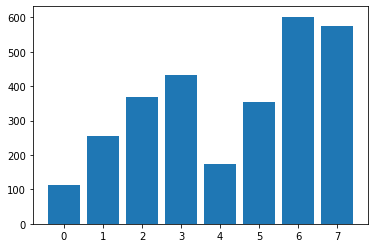

In [ ]:
importance = LGBM_model.feature_importances_

plt.bar([i for i in range(len(importance))], importance)
plt.show()

# Predict the Test set Results

LGBM

In [ ]:
x_test = df_test.iloc[:,[j for j in range(0,8)]]
y_test = df_test.iloc[:,-1]

In [ ]:
pred_LGBM = LGBM_model.predict(x_test)

# Evaluation of Algorithms

LGBM

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

def Evaluation(y_test, y_pred):
  MAE = mean_absolute_error(y_test, y_pred)
  MAPE = mean_absolute_percentage_error(y_test, y_pred)
  return [round(MAE, 4), round(MAPE, 4)]

In [ ]:
LGBM_Evaluation = Evaluation(y_test, pred_LGBM)

Evaluation_Result = pd.DataFrame([LGBM_Evaluation], index = ['LGBM'] , columns = ['MAE', 'MAPE'])
Evaluation_Result

,MAE,MAPE
LGBM,0.5492,0.1043
